# Resampling, Oversampling, Undersampling and SMOTE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/gdrive/', force_remount = True)

df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

Mounted at /content/gdrive/


In [2]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [2]:
# Import packages
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [3]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])

df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]

X = pd.get_dummies(df_select, ['category']).drop(['trans_date_trans_time', 'is_fraud'], axis = 1)
y = df['is_fraud']

<ipython-input-3-3c44536b2813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time'] = pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-3-3c44536b2813>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.second for i in df_select['trans_date_trans_time']]


In [4]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [25]:
# Split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)   #is_fraud is the last column

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [26]:
from sklearn.model_selection import train_test_split

# Oversample
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

# Undersample
rus = RandomUnderSampler()
under_X, under_y = ros.fit_resample(X_train, y_train)

# SMOTE
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train, y_train)


#3.) Train three logistic regression models 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

over_log = LogisticRegression().fit(over_X, over_y)
under_log = LogisticRegression().fit(under_X, under_y)
smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [28]:
y_pred_over = over_log.predict(X_test)
y_pred_under = under_log.predict(X_test)
y_pred_smote = smote_log.predict(X_test)

# 5.) Which performed best in Out of Sample metrics?

In [29]:
from sklearn import metrics

# Over
# confusion_matrix_over = 
cf_over = metrics.confusion_matrix(y_test, y_pred_over)
cf_over

array([[134756,  31325],
       [   150,    485]])

In [30]:
# Accuracy
(cf_over[0][0]+cf_over[1][1])/(cf_over[0][0]+cf_over[1][1]+cf_over[0][1]+cf_over[1][0])

0.8112058830586146

In [31]:
# Under
cf_under = metrics.confusion_matrix(y_test, y_pred_under)
cf_under

array([[134782,  31299],
       [   150,    485]])

In [32]:
# Accuracy
(cf_under[0][0]+cf_under[1][1])/(cf_under[0][0]+cf_under[1][1]+cf_under[0][1]+cf_under[1][0])

0.8113618368962787

In [33]:
# Smote
cf_smote = metrics.confusion_matrix(y_test, y_pred_smote)
cf_smote

array([[136116,  29965],
       [   151,    484]])

In [34]:
# Accuracy
(cf_smote[0][0]+cf_smote[1][1])/(cf_smote[0][0]+cf_smote[1][1]+cf_smote[0][1]+cf_smote[1][0])

0.8193574701888241

The accuracy calculated by the confusion matrix is the highest with the SMOTE model. 

# 6.) Pick two features and plot the two classes before and after SMOTE.

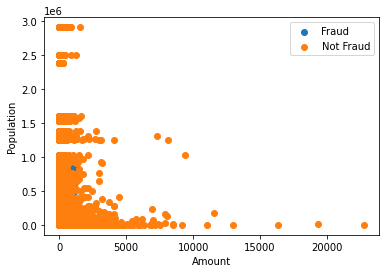

In [35]:
# X = "trans_date_trans_time", "category", "amt", "city_pop"
# y = "is_fraud"

# Before SMOTE
raw_temp = pd.concat([X_train, y_train], axis = 1)

plt.scatter(raw_temp[raw_temp['is_fraud'] == 1]['amt'], raw_temp[raw_temp['is_fraud'] == 1]['city_pop'])
plt.scatter(raw_temp[raw_temp['is_fraud'] == 0]['amt'], raw_temp[raw_temp['is_fraud'] == 0]['city_pop'])
plt.legend(['Fraud', 'Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')

plt.show()

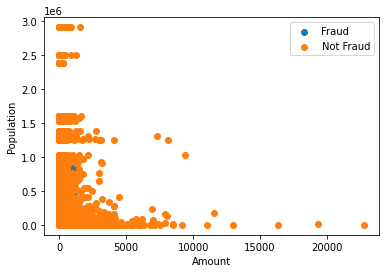

In [36]:
# After SMOTE
raw_temp2 = pd.concat([smote_X, smote_y], axis = 1)
plt.scatter(raw_temp2[raw_temp2['is_fraud'] == 1]['amt'], raw_temp2[raw_temp2['is_fraud'] == 1]['city_pop'])
plt.scatter(raw_temp2[raw_temp2['is_fraud'] == 0]['amt'], raw_temp2[raw_temp2['is_fraud'] == 0]['city_pop'])
plt.legend(['Fraud', 'Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')

plt.show()